# Homework:

1)Given the dataframe attached "df3.csv", which columns contributed to creating the column "f"?

2)Plot the function y = 1/x between -10 and 10 

3)Recreate the following heatmaps:
![Im1](week5/Screenshot.png)
<img src="week5/Im1.png" alt="Drawing" style="width: 200px;"/>,
<img src="attachment:3aa4d5c8-6c88-436c-b48b-5d3cb0c7d19d.png" alt="Drawing" style="width: 200px;"/>,
<img src="attachment:945c6609-38e8-4f42-afbf-fb01ef4483bb.png" alt="Drawing" style="width: 200px;"/>

In [3]:
!pip install pandas==1.5.3
!pip install plotly==6.0.0
!pip install matplotlib==3.10.0
!pip install seaborn==0.13.2
!pip install statsmodels


  Using cached pandas-1.5.3.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: still running...
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build pandas


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [2514 lines of output]
  <string>:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-313\pandas
  copying pandas\conftest.py -> build\lib.win-amd64-cpython-313\pandas
  copying pandas\testing.py -> build\lib.win-amd64-cpython-313\pandas
  copying pandas\_typing.py -> build\lib.win-amd64-cpython-313\pandas
  copying pandas\_version.py -> build\lib.win-amd64-cpython-313\pandas
  copying pandas\__init__.py -> build\lib.win-amd64-cpython-313\pandas
  creating build\lib.win-amd64-cpython-313\pandas\api
  copying pandas\api\__init__.py -> build\lib.win-amd64-cpython-313\pandas\api
  creating build\lib.win-amd64-cpython-313\pandas\arrays
  copying pandas\arrays\__init__.py -> build\lib.win-amd64-cpython-313\pandas\arrays
  creating build\lib.win-amd64-cpython-313\pand


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose

# ESERCIZIO 1

In [153]:
df=pd.read_csv("df3.csv")

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10000 non-null  int64  
 1   a           10000 non-null  float64
 2   b           10000 non-null  float64
 3   c           10000 non-null  float64
 4   d           10000 non-null  int64  
 5   x           10000 non-null  float64
 6   y           10000 non-null  float64
 7   z           10000 non-null  int64  
 8   h           10000 non-null  int64  
 9   g           10000 non-null  float64
 10  f           10000 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 859.5 KB


In [155]:
df.head()

,Unnamed: 0,a,b,c,d,x,y,z,h,g,f
0,0,19.087423,-45.948735,45.727892,0,-1.685862,-44.262872,0,0,47.413754,45.263782
1,1,20.487493,-35.777837,49.552648,1,-1.506121,-34.271716,0,0,51.058770,544.311461
2,2,18.690196,-8.861605,48.903702,0,0.052330,-8.913935,0,0,48.851372,8.152672
3,3,19.429664,124.437220,48.357539,1,-0.640684,125.077904,0,0,48.998223,365.286478
4,4,20.909506,113.067077,49.989816,0,0.140450,112.926626,0,0,49.849366,-112.405410


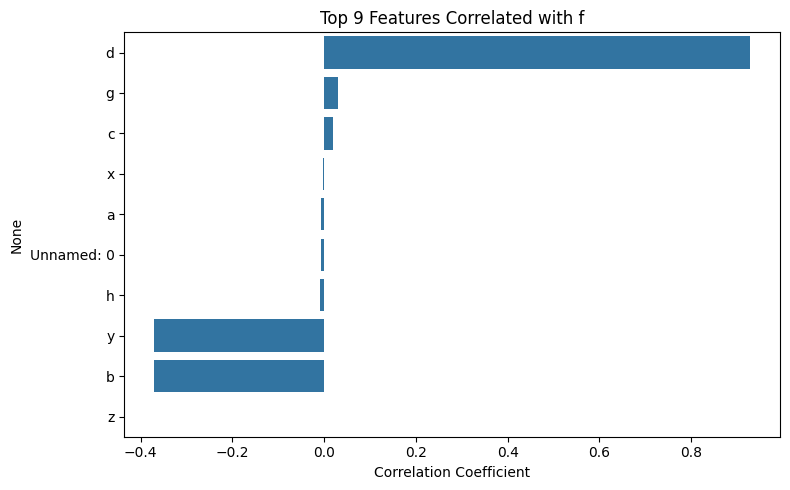

f               1.000 (Strong)
d               0.929 (Strong)
g             0.030 (Moderate)
c             0.020 (Moderate)
x                -0.002 (Weak)
a                -0.006 (Weak)
Unnamed: 0       -0.008 (Weak)
h                -0.009 (Weak)
y              -0.371 (Strong)
b              -0.371 (Strong)
Name: f, dtype: object

In [156]:
numeric_db = df.select_dtypes(include = ['int64', 'float64'])
#databadse in cui ho selezionato le colonne di un certo tipo

correlation = numeric_db.corr()['f'].sort_values(ascending = False)
#correlazione delle colonne del database con survived
#faccio il sort per ordinare le correlazioni con loro stessi (a 1) e le salto

plt.figure(figsize = (8,5))
top_features = correlation[1:]
sns.barplot(x = top_features.values, y = top_features.index)
plt.title('Top 9 Features Correlated with f')
plt.xlabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

correlation.apply(lambda x: f"{x:.3f} ({'Strong' if abs(x) > 0.1 else 'Moderate' if abs(x) > 0.01 else 'Weak'})").head(10)

# prima analisi:
1. La correlazione più forte di f è con d, b e y. 

2. y e b però sembrano essere dipendenti tra loro.

# Verifico con una heatmap la correlazione tra tutte le variabili

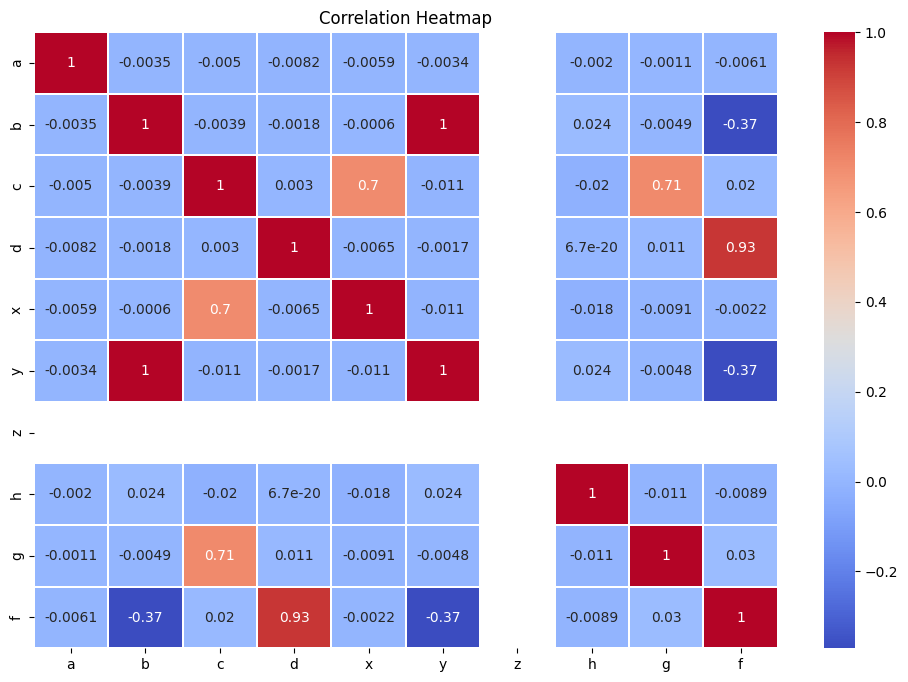

In [187]:
# Correlation Heatmap for selected numeric columns
plt.figure(figsize=(12, 8))
cols = [ 'a',	'b',	'c',	'd',	'x',	'y',	'z',	'h',	'g',	'f']
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)
#sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title("Correlation Heatmap")
plt.show()

rimuovo l'elemento z che non fornisce informazioni

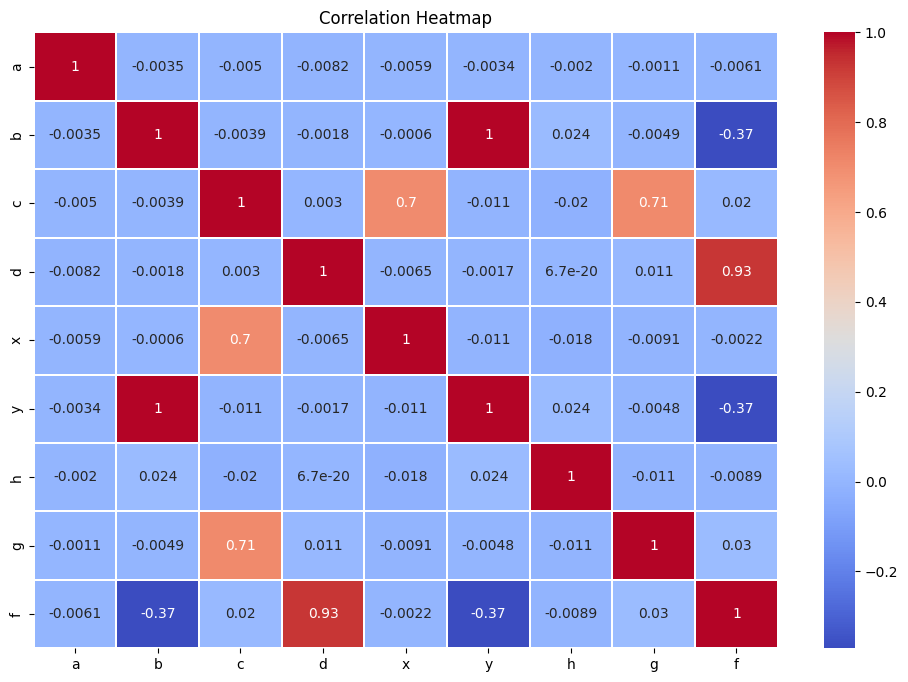

In [189]:
# Correlation Heatmap for selected numeric columns
plt.figure(figsize=(12, 8))
cols = [ 'a',	'b',	'c',	'd',	'x',	'y',	'h',	'g',	'f']
corr = df[cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.1)
#sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.1)
plt.title("Correlation Heatmap")
plt.show()

c dipende da g e x


f dipende da y g d

# Seconda analisi
la heatmap mi conferma che y e b sono dipendenti

F è in correlazione con d e b ( o y)

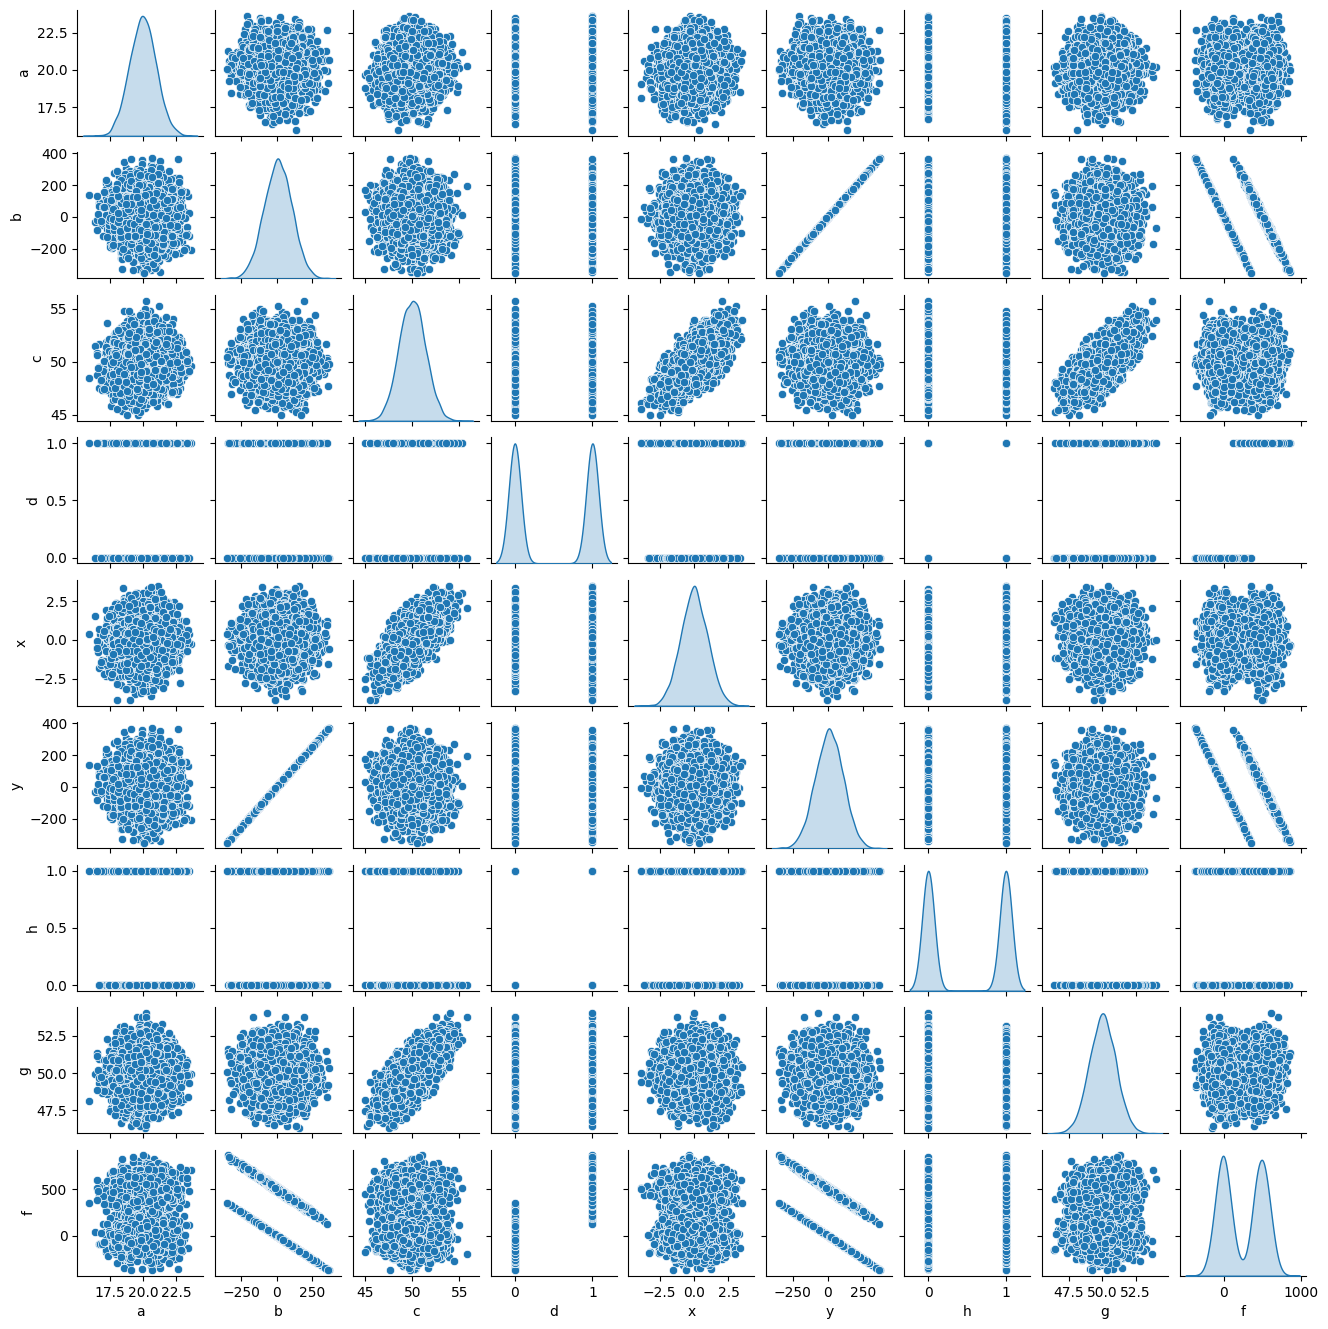

In [194]:
sns.pairplot(df[cols], diag_kind='kde', height=1.5)
plt.show()

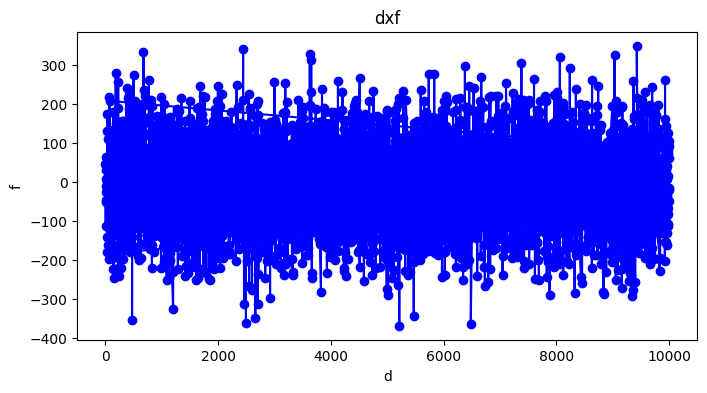

In [206]:
plt.figure(figsize=(8, 4))
df_sort = df[df['d']==0].sort_values('d')
plt.plot(df_sort.index, df_sort['f'], marker='o', linestyle='-', color='b')
plt.title("dxf")
plt.xlabel("d")
plt.ylabel("f")
plt.show()

# ESERCIZIO 2 
Plot the function y = 1/x between -10 and 10

In [1]:
#x=np.linspace(-10,10,100)

#x=np.concatenate([np.linspace(-10,-2.5,5), np.linspace(-2.5,2.5,15),np.linspace(2.5,10,5)]) #in questo caso trova lo 0 in x
x=np.concatenate([np.linspace(-10,-2,5), np.linspace(-2,-0.1,10)])
x=np.concatenate([np.linspace(0.1,2,10), np.linspace(2,10,5)]) #stesso intervallo della prima ma con meno punti

#x=np.concatenate([np.linspace(-10,-2,5), np.linspace(-2,-0.1,10),np.linspace(0.1,2,10), np.linspace(2,10,5)]) #stesso intervallo della prima ma con meno punti
y= 1/x
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("y=1/x")
plt.title("graph")
plt.show()

NameError: name 'np' is not defined

# Esercizio 3

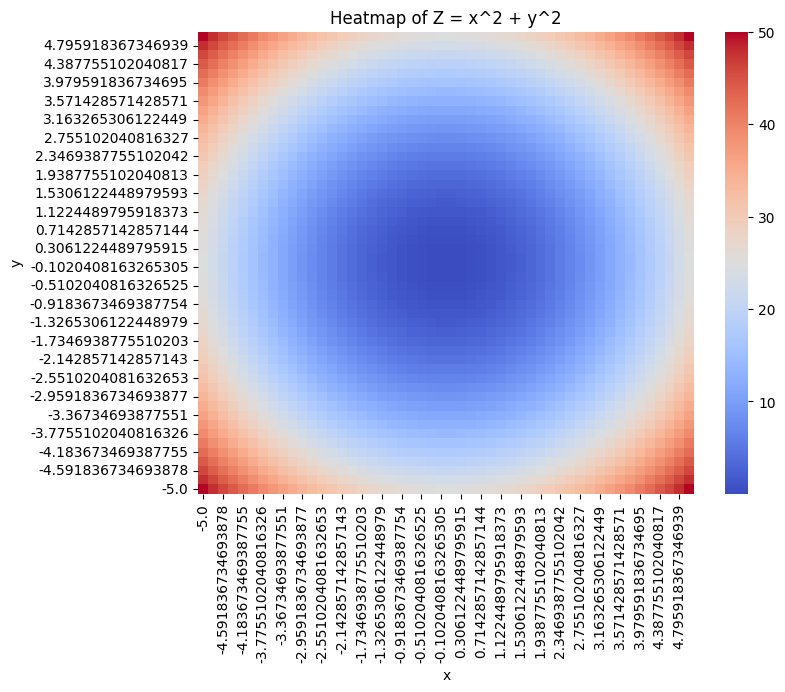

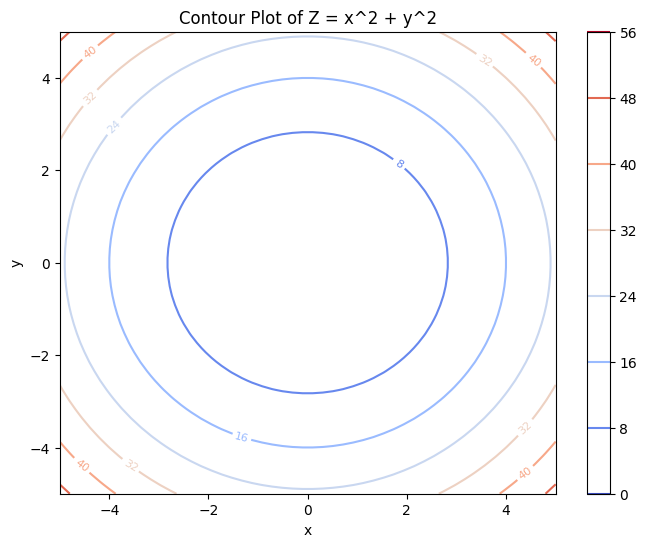

In [181]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = X**2 + Y**2

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of Z = x^2 + y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()
plt.show()

#trovo le curve di livello della heatmap
# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of Z = x^2 + y^2')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

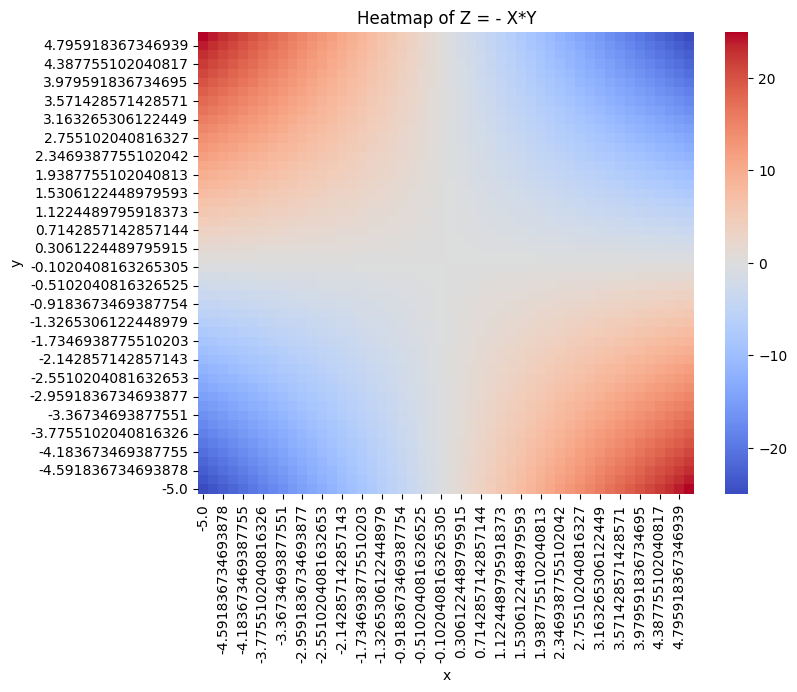

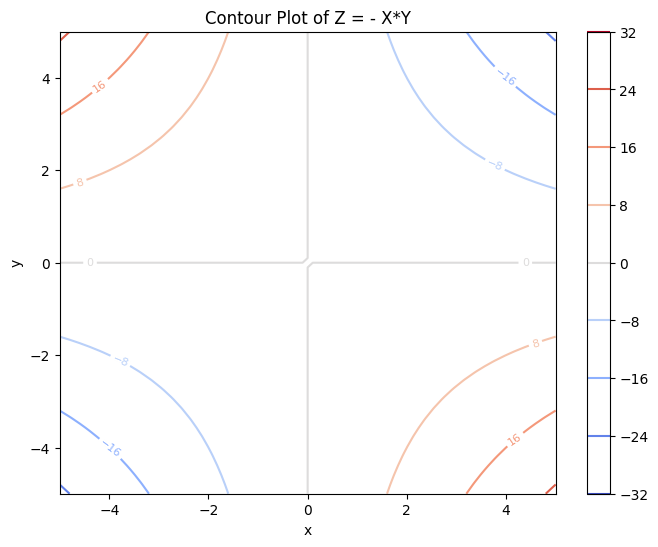

In [149]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z = -X*Y

# Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of Z = - X*Y')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()
plt.show()

#trovo le curve di livello della heatmap
# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of Z = - X*Y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()

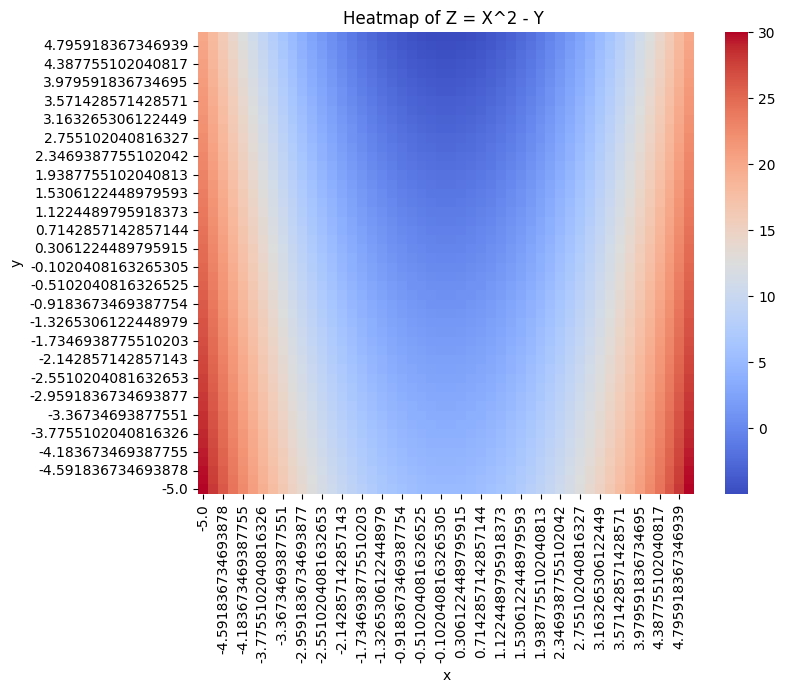

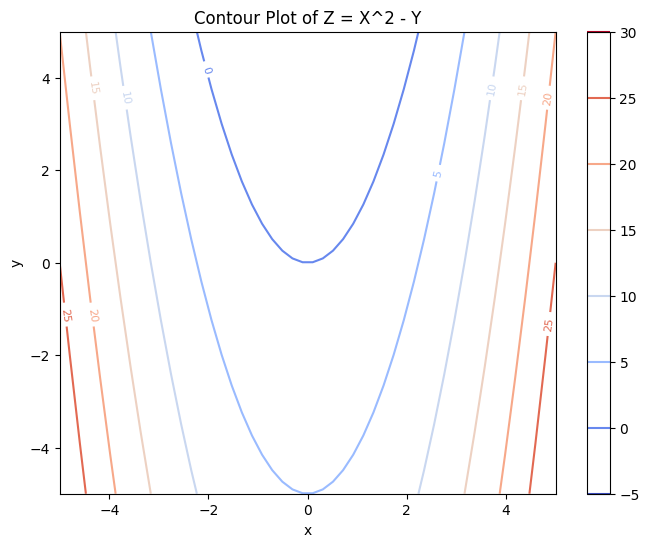

In [152]:
# Generate simulation data for heatmap
x_vals = np.linspace(-5, 5, 50)
y_vals = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x_vals, y_vals)
Z=X**2 - Y

#Convert to DataFrame
df_simulation = pd.DataFrame({'x': X.ravel(), 'y': Y.ravel(), 'z': Z.ravel()})

# Pivot the data for heatmap
heatmap_data = df_simulation.pivot(index='y', columns='x', values='z')

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False)
plt.title('Heatmap of Z = X^2 - Y ')
plt.xlabel('x')
plt.ylabel('y')
plt.gca().invert_yaxis()
plt.show()

#trovo le curve di livello della heatmap
# Plot contour lines
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z, cmap='coolwarm')
plt.clabel(contour, inline=True, fontsize=8)
plt.title('Contour Plot of Z = X^2 - Y')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()